<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Импортируем-библиотеки-и-извлечём-файлы" data-toc-modified-id="Импортируем-библиотеки-и-извлечём-файлы-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импортируем библиотеки и извлечём файлы</a></span></li><li><span><a href="#Проверим-формулу-эффективности-обогащения-на-обучающей-выборке-для-признака-rougher.output.recovery.-Найдём-MAE." data-toc-modified-id="Проверим-формулу-эффективности-обогащения-на-обучающей-выборке-для-признака-rougher.output.recovery.-Найдём-MAE.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверим формулу эффективности обогащения на обучающей выборке для признака rougher.output.recovery. Найдём MAE.</a></span></li><li><span><a href="#Проанализируем-отличие-признаков-в-тестовой-и-обучающей-выборках." data-toc-modified-id="Проанализируем-отличие-признаков-в-тестовой-и-обучающей-выборках.-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проанализируем отличие признаков в тестовой и обучающей выборках.</a></span></li><li><span><a href="#Проведём-предобработку-данных." data-toc-modified-id="Проведём-предобработку-данных.-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Проведём предобработку данных.</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Оценим-изменение-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Оценим-изменение-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Оценим изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки</a></span></li><li><span><a href="#Сравним-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Сравним-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравним распределения размеров гранул сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#Исследуйте-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах." data-toc-modified-id="Исследуйте-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Напишеме-функцию-для-вычисления-sMAPE" data-toc-modified-id="Напишеме-функцию-для-вычисления-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Напишеме функцию для вычисления sMAPE</a></span></li><li><span><a href="#Обучим-несколько-моделей-и-оценим-их-качество-кросс-валидацией.-Проверим-модели-на-тестовой-выборке." data-toc-modified-id="Обучим-несколько-моделей-и-оценим-их-качество-кросс-валидацией.-Проверим-модели-на-тестовой-выборке.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучим несколько моделей и оценим их качество кросс-валидацией. Проверим модели на тестовой выборке.</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

### Импортируем библиотеки и извлечём файлы

In [1]:
#импортируем требуемые библиотеки
import pandas as pd
import numpy as np
from random import randrange
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer

import numpy as np
from matplotlib import pyplot
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
df_train.head(3)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [5]:
df_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


### Проверим формулу эффективности обогащения на обучающей выборке для признака rougher.output.recovery. Найдём MAE.

Напишем формулу обогащения в соответствии с задание и сравним через абсолютное отклоние MAE корректность расчёта в соответствии с формулой.

In [6]:
recovery_calculation = (
    df_train['rougher.output.concentrate_au']*(
        df_train['rougher.input.feed_au']-df_train['rougher.output.tail_au']
    )
)/(
    df_train['rougher.input.feed_au']*(
        df_train['rougher.output.concentrate_au']-df_train['rougher.output.tail_au']
                                      )
)*100

recovery_rougher = df_train['rougher.output.recovery']

In [7]:
print('MAE:', mean_absolute_error(recovery_rougher, recovery_calculation))

MAE: 9.73512347450521e-15


Как видим отклонение минимально и формула работает предельно корректно

### Проанализируем отличие признаков в тестовой и обучающей выборках.

Загрузим основную информацию о тестовом датасете:

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

Проверим отличия в столбцах в обучающем и тестовом датасетах

In [9]:
set(df_train.columns)-set(df_test.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Как мы видим, сравнивая основную информацию в тестовом датасете отсутствуют промежуточные данные подэтапов производства, итоговые результаты финального концентрата находящегося в крайней точке технологического процесса, а также целевые признаки.
Стоит это обратить внимание и привести к единому набору признаков и целевых признаков к моменту написания моделей обучения.

In [10]:
df_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


### Проведём предобработку данных.

Изменим формат даты с object на datetime в каждом датафрейме

In [11]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_test['date'] = pd.to_datetime(df_test['date'])
df['date'] = pd.to_datetime(df['date'])

Заменим присутствующие пропуски методом fillna на схожие по дате.

In [12]:
df_train = df_train.fillna(method='backfill')
df_test = df_test.fillna(method='backfill')
df = df.fillna(method='backfill')

## Анализ данных

### Оценим изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки

Сгруппируем необходимые данные по переменным для построения гистограмм.

In [13]:
graf_au = df[
    ['rougher.input.feed_au',
     'rougher.output.concentrate_au', 
     'primary_cleaner.output.concentrate_au',
     'final.output.concentrate_au']
]

graf_ag = df[
    ['rougher.input.feed_ag',
     'rougher.output.concentrate_ag', 
     'primary_cleaner.output.concentrate_ag',
     'final.output.concentrate_ag']
]

graf_pb = df[
    ['rougher.input.feed_pb',
     'rougher.output.concentrate_pb', 
     'primary_cleaner.output.concentrate_pb',
     'final.output.concentrate_pb']
] 

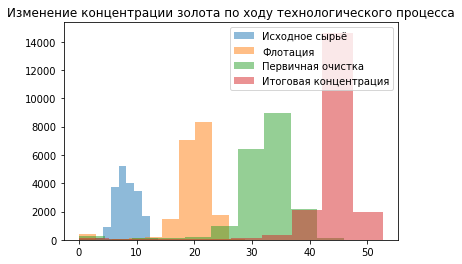

In [14]:
pyplot.hist(graf_au['rougher.input.feed_au'], alpha=0.5, label='Исходное сырьё')
pyplot.hist(graf_au['rougher.output.concentrate_au'], alpha=0.5, label='Флотация')
pyplot.hist(graf_au['primary_cleaner.output.concentrate_au'], alpha=0.5, label='Первичная очистка',)
pyplot.hist(graf_au['final.output.concentrate_au'], alpha=0.5, label='Итоговая концентрация')
pyplot.legend(loc='upper right')
pyplot.title('Изменение концентрации золота по ходу технологического процесса')
pyplot.show()

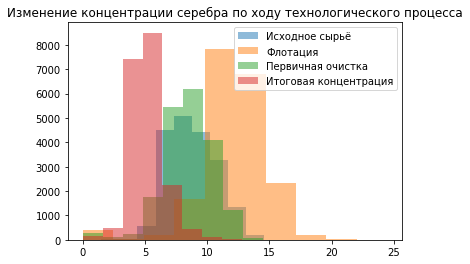

In [15]:
pyplot.hist(graf_ag['rougher.input.feed_ag'], alpha=0.5, label='Исходное сырьё')
pyplot.hist(graf_ag['rougher.output.concentrate_ag'], alpha=0.5, label='Флотация')
pyplot.hist(graf_ag['primary_cleaner.output.concentrate_ag'], alpha=0.5, label='Первичная очистка')
pyplot.hist(graf_ag['final.output.concentrate_ag'], alpha=0.5, label='Итоговая концентрация')
pyplot.legend(loc='upper right')
pyplot.title('Изменение концентрации серебра по ходу технологического процесса')
pyplot.show()

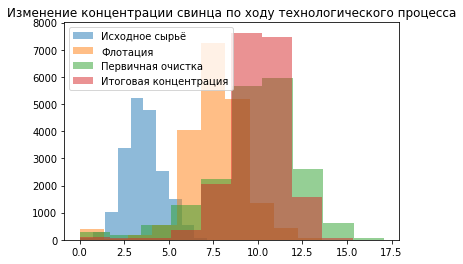

In [16]:
pyplot.hist(graf_pb['rougher.input.feed_pb'], alpha=0.5, label='Исходное сырьё')
pyplot.hist(graf_pb['rougher.output.concentrate_pb'], alpha=0.5, label='Флотация')
pyplot.hist(graf_pb['primary_cleaner.output.concentrate_pb'], alpha=0.5, label='Первичная очистка')
pyplot.hist(graf_pb['final.output.concentrate_pb'], alpha=0.5, label='Итоговая концентрация')
pyplot.legend(loc='upper left')
pyplot.title('Изменение концентрации свинца по ходу технологического процесса')
pyplot.show()

Как мы можем судить технологический процесс очистки от примесей золотого сырья сложен и концентрации примесей не всегда понятны логически наблюдателям не погружённым в технологический процесс, но можно судить что по ходу очистки от примесей концентрация золота расчёт, серебра падает, а свинца итоговая концентрация не сильно отличается от первоначальной, но на момент выполнения процесса флотации падает.

### Сравним распределения размеров гранул сырья на обучающей и тестовой выборках

Исследуем размер гранул на стадии исходного сырья:

In [17]:
graf_train = df_train['rougher.input.feed_size']
graf_test = df_test['rougher.input.feed_size']

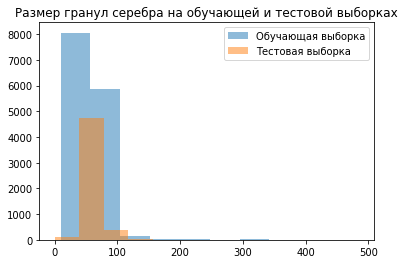

In [18]:
pyplot.hist(graf_train, alpha=0.5, label='Обучающая выборка')
pyplot.hist(graf_test, alpha=0.5, label='Тестовая выборка')
pyplot.legend(loc='upper right')
pyplot.title('Размер гранул серебра на обучающей и тестовой выборках')
pyplot.show()

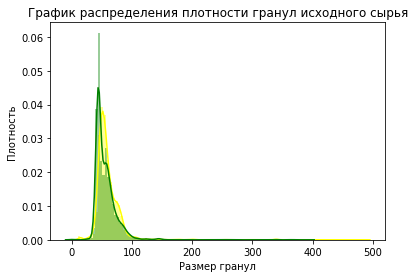

In [19]:
ax = sns.distplot(graf_train, bins=100, color='yellow')
ax = sns.distplot(graf_test, bins=100, color='green')
ax.set_title('График распределения плотности гранул исходного сырья')
ax.set_xlabel('Размер гранул')
ax.set_ylabel('Плотность');

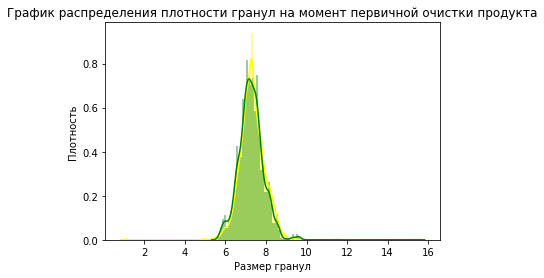

In [20]:
graf_primary_train = df_train['primary_cleaner.input.feed_size']
graf_primary_test = df_test['primary_cleaner.input.feed_size']
ax = sns.distplot(graf_primary_train, bins=100, color='yellow')
ax = sns.distplot(graf_primary_test, bins=100, color='green');
ax.set_title('График распределения плотности гранул на момент первичной очистки продукта')
ax.set_xlabel('Размер гранул')
ax.set_ylabel('Плотность');

Как мы видим размер гранул сырья сопоставим и находится приблизительно в одних и тех же интервалах (обучающая выборка больше по размеру и разброс соответственно выше).

### Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

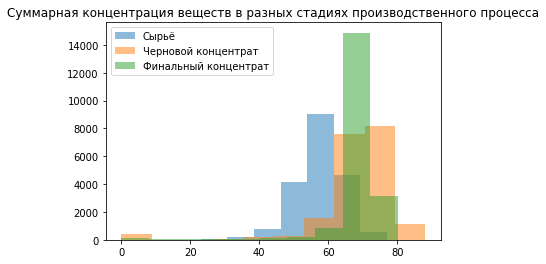

In [21]:
rougher_input = df['rougher.input.feed_ag']+df['rougher.input.feed_au']+df['rougher.input.feed_pb']+df['rougher.input.feed_sol']
rougher_output = df['rougher.output.concentrate_ag']+df['rougher.output.concentrate_au']+df['rougher.output.concentrate_pb']+df['rougher.output.concentrate_sol']
final_output = df['final.output.concentrate_ag']+df['final.output.concentrate_au']+df['final.output.concentrate_pb']+df['final.output.concentrate_sol']


pyplot.hist(rougher_input, alpha=0.5, label='Сырьё')
pyplot.hist(rougher_output, alpha=0.5, label='Черновой концентрат')
pyplot.hist(final_output, alpha=0.5, label='Финальный концентрат')

pyplot.legend(loc='upper left')
pyplot.title('Суммарная концентрация веществ в разных стадиях производственного процесса')
pyplot.show()

Как мы видим из гистограммы присутствуют с высокой долей вероятности "мусорные значения", которых минимальное колличество. Исключим эти данные из обучающего датасета для повышения точности обучаемых моделей.

In [22]:
df_train['sum_rougher_input'] = df_train['rougher.input.feed_ag']+df_train['rougher.input.feed_au']+df_train['rougher.input.feed_pb']+df_train['rougher.input.feed_sol']
df_train['sum_rougher_output'] = df_train['rougher.output.concentrate_ag']+df_train['rougher.output.concentrate_au']+df_train['rougher.output.concentrate_pb']+df_train['rougher.output.concentrate_sol']
df_train['sum_final_output'] = df_train['final.output.concentrate_ag']+df_train['final.output.concentrate_au']+df_train['final.output.concentrate_pb']+df_train['final.output.concentrate_sol']

df_train = df_train.query('sum_rougher_input > 30 and sum_rougher_output > 30 and sum_final_output>30')


## Модель

### Напишеме функцию для вычисления sMAPE

In [23]:
def smape(target, prediction):
    return 1/len(target) * np.sum(np.abs(prediction - target) / (np.abs(target) + np.abs(prediction))*2)*100

In [26]:
#создадим фунцию для оценки качества моделей
#для дальнейшего использования GridSearch установим greater_is_better как False 
#чтобы выбиралось наименьшее значсение
smape_scorer = make_scorer(smape, greater_is_better=False) 

### Обучим несколько моделей и оценим их качество кросс-валидацией. Проверим модели на тестовой выборке.

Приведём колонки в соответствии с тестовым датасетом для корректного обучения моделей:

In [24]:
columns_test = df_test.columns
columns_target = ['rougher.output.recovery','final.output.recovery']
columns_test = columns_test.values.tolist()
columns_test = columns_test+columns_target
columns_test
df_train_new = df_train[columns_test]
df_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13655 entries, 0 to 14148
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        13655 non-null  datetime64[ns]
 1   primary_cleaner.input.sulfate               13655 non-null  float64       
 2   primary_cleaner.input.depressant            13655 non-null  float64       
 3   primary_cleaner.input.feed_size             13655 non-null  float64       
 4   primary_cleaner.input.xanthate              13655 non-null  float64       
 5   primary_cleaner.state.floatbank8_a_air      13655 non-null  float64       
 6   primary_cleaner.state.floatbank8_a_level    13655 non-null  float64       
 7   primary_cleaner.state.floatbank8_b_air      13655 non-null  float64       
 8   primary_cleaner.state.floatbank8_b_level    13655 non-null  float64       
 9   primar

In [25]:
target_out = df_train_new['rougher.output.recovery']
target_final = df_train_new['final.output.recovery']
features = df_train_new.drop(['date','rougher.output.recovery','final.output.recovery'] , axis=1)

In [27]:
model_out_1 = LinearRegression()
model_out_1.fit(features, target_out)


scores_out_1 = cross_val_score(model_out_1, features, target_out, cv=5, scoring = smape_scorer)
final_score_out_1 = scores_out_1.mean()

print('Средняя оценка качества модели:', final_score_out_1)
print('sMAPE:',scores_out_1)

Средняя оценка качества модели: -7.037941112198507
sMAPE: [-9.18031572 -7.0700969  -5.44100556 -4.93551675 -8.56277064]


In [28]:
model_final_1 = LinearRegression()
model_final_1.fit(features, target_final)


scores_final_1 = cross_val_score(model_final_1, features, target_final, cv=5, scoring = smape_scorer)
final_score_final_1 = scores_final_1.mean()


print('Средняя оценка качества модели:', final_score_final_1)
print('sMAPE:',scores_final_1)

Средняя оценка качества модели: -10.694612149555661
sMAPE: [-12.61545569  -9.29801351  -8.87836705  -9.17575157 -13.50547293]


In [29]:
parametrs = {'max_depth': range (16,22,2),
             'n_estimators':  range(80, 110, 10)}

clf = RandomForestRegressor()

In [30]:
%%time
grid = GridSearchCV(clf, parametrs, cv=5,scoring=smape_scorer)
grid.fit(features, target_out)
grid.best_params_

CPU times: user 30min 23s, sys: 4.72 s, total: 30min 28s
Wall time: 30min 31s


{'max_depth': 20, 'n_estimators': 80}

In [31]:
%%time
grid = GridSearchCV(clf, parametrs, cv=5,scoring=smape_scorer)
grid.fit(features, target_final)
grid.best_params_

CPU times: user 31min 7s, sys: 5.91 s, total: 31min 12s
Wall time: 31min 15s


{'max_depth': 20, 'n_estimators': 100}

In [32]:
model_out_2 = RandomForestRegressor(n_estimators=80, max_depth=18, random_state=12345)
model_out_2.fit(features, target_out)

scores_out_2 = cross_val_score(model_out_2, features, target_out, cv=5, scoring = smape_scorer)
final_score_out_2 = scores_out_2.mean()

print('Средняя оценка качества модели:', final_score_out_2)
print('sMAPE:',scores_out_2)

Средняя оценка качества модели: -6.68894950419204
sMAPE: [-7.96016813 -7.40691326 -4.50015276 -6.23725535 -7.34025803]


In [33]:
model_final_2 = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=12345)
model_final_2.fit(features, target_final)

scores_final_2 = cross_val_score(model_final_2, features, target_final, cv=5, scoring = smape_scorer)
final_score_final_2 = scores_final_2.mean()

print('Средняя оценка качества модели:', final_score_final_2)
print('sMAPE:',scores_final_2)

Средняя оценка качества модели: -9.527731750276079
sMAPE: [ -8.95602614 -10.61118794  -8.76485554  -9.12912334 -10.17746579]


Как мы видим наилучшие показатели по обоим целевым признакам по оценкам показателя sMAPE и кросс-валидации за методом случайного леса.

Оценим работу моделей на тестовой выборке, добавив к ней целевые признаки

In [34]:
data_test = df_test.merge(df, how='left').loc[:,columns_test]
data_test.head(3)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213


In [35]:
target_output_test = data_test['rougher.output.recovery']
target_final_test = data_test['final.output.recovery']
features_test = data_test.drop(['date','rougher.output.recovery','final.output.recovery'] , axis=1)

In [36]:
predictions_out_test= model_out_2.predict(features_test)

print('sMAPE:',smape(target_output_test, predictions_out_test))

sMAPE: 8.123147766242964


In [37]:
predictions_final_test = model_final_2.predict(features_test)

print('sMAPE:',smape(target_final_test, predictions_final_test))

sMAPE: 9.661216671714154


Рассчитаем итоговый sMAPE:

In [38]:
final_smape = 0.25*smape(target_output_test, predictions_out_test)+0.75*smape(target_final_test, predictions_final_test)
print('Итоговый sMAPE составляет:',final_smape)

Итоговый sMAPE составляет: 9.276699445346356


## Выводы

Результатом текущего проекта можно считать обученную модель методом случайного леса, которая позволяет оценить на основании входных параметров сырья итоговую эффективность обогащения после этапа флотации и итогового продукта находящегося в финальной точке технологического процесса. 

Это позволит бизнесу оптимизировть технологический процесс и повысить маржинальность, путём отбора и расчёта операций которые принесут прибыль. Дополнительно к данной модели необходимо сделать экономический расчёт с точкой безубыточности, чтобы понимать с достижение какого результата предсказания модели следует отказаться от запуска технологический процесс золотосодержащей руды с вводыми характеристиками.
